In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# PYTHON PROJECT 1

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## DATA ANALYSIS OF NSA PA BEVERAGES

> *BANI BERES ETORNAM* - 10948391
_CPEN_

### FETCHING, PARSING AND CLEANING DATA FROM CSV

![separator2](https://i.imgur.com/4gX5WFr.png)

In [36]:
data = pd.read_csv(
    'data.csv',
    index_col = 0
)

In [13]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
ID                                                                            
1             7.4              0.70         0.00             1.9      0.076   
2             7.8              0.88         0.00             2.6      0.098   
3             7.8              0.76         0.04             2.3      0.092   
4            11.2              0.28         0.56             1.9      0.075   
5             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
ID                                                                        
1                  11.0                  34.0   0.9978  3.51       0.56   
2                  25.0                  67.0   0.9968  3.20       0.68   
3                  15.0                  54.0   0.9970   NaN       0.65   
4                  17.0                  60.0   0.9980  3.16       0.58   
5                  11.0                  34.0   0.9978  3.51       0.56   

    alcohol  quality  
ID                    
1       9.4      5.0  
2       9.8      5.0  
3       9.8      5.0  
4       9.8      6.0  
5       9.4      5.0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 1 to 1601
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1600 non-null   float64
 1   volatile acidity      1601 non-null   float64
 2   citric acid           1600 non-null   float64
 3   residual sugar        1601 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free sulfur dioxide   1600 non-null   float64
 6   total sulfur dioxide  1600 non-null   float64
 7   density               1600 non-null   float64
 8   pH                    1600 non-null   float64
 9   sulphates             1601 non-null   float64
 10  alcohol               1601 non-null   float64
 11  quality               1600 non-null   float64
dtypes: float64(12)
memory usage: 162.6 KB


### REMOVING NULL VALUES

![separator2](https://i.imgur.com/4gX5WFr.png)

In [23]:
data.isnull().sum()

fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

>There are some null values in the columns. 1 null value in the column `fixed acidity` and so on.

In [27]:
data[data['pH'].isnull()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
ID                                                                            
3             7.8              0.76         0.04             2.3      0.092   

    free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  \
ID                                                                      
3                  15.0                  54.0    0.997 NaN       0.65   

    alcohol  quality  
ID                    
3       9.8      5.0

> The problem with the null value at the `pH` column provides some issues. Is the pH infered as 0 or 7? Definitely every beverage must have a pH.
A away around is to calculate the pH using a realation that maps `fixed acidity, volatile acidity and pH` as follows:
>> `pH = 3.87 -0.011 *(fixed acidity + volatile acidity)`.

> However, the accuracy of this relation is debatable. There is no way to also determine the pH with other values of the beverage in the data. Therefore, dropping that column or calling in to replace that data with the actual value.
> >To maintian the accuracy of the data distribution, the mean of the columns would be assigned to the missing values.

In [37]:
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace = True)

In [44]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

> After assigning the maean of the `fixed acids` column to the null values, data integretity and consistency is maintaained. This is a better method compared to losing data on products by dropping entire rows due to the existance of null values
This will be done for all columns with null values to clean the dataframe

In [47]:
data['citric acid'].fillna(data['citric acid'].mean(), inplace = True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace = True)
data['free sulfur dioxide'].fillna(data['free sulfur dioxide'].mean(), inplace = True)
data['total sulfur dioxide'].fillna(data['total sulfur dioxide'].mean(), inplace = True)
data['density'].fillna(data['density'].mean(), inplace = True)
data['pH'].fillna(data['pH'].mean(), inplace = True)
data['quality'].fillna(data['quality'].mean(), inplace = True)

In [48]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> The null values have now been replaced. 

### REMOVING DUPLICATES

![separator2](https://i.imgur.com/4gX5WFr.png)

> The dataframe `data` can have certain columns equal. Thus two or more products may have the same properties; which is not a violation whatsoever. However in the event of all the rows being the same, including the row indexes, then the duplicates must be removed

In [57]:
data[data.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
ID                                                                              
5               7.4             0.700         0.00            1.90      0.076   
12              7.5             0.500         0.36            6.10      0.071   
28              7.9             0.430         0.21            1.60      0.106   
41              7.3             0.450         0.36            5.90      0.074   
66              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1566            7.2             0.695         0.13            2.00      0.076   
1569            7.2             0.695         0.13            2.00      0.076   
1583            6.2             0.560         0.09            1.70      0.053   
1598            6.3             0.510         0.13            2.30      0.076   
1601            7.2             0.390         0.44            2.60      0.066   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
ID                                                                          
5                    11.0                  34.0  0.99780  3.51       0.56   
12                   17.0                 102.0  0.99780  3.35       0.80   
28                   10.0                  37.0  0.99660  3.17       0.91   
41                   12.0                  87.0  0.99780  3.33       0.83   
66                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1566                 12.0                  20.0  0.99546  3.29       0.54   
1569                 12.0                  20.0  0.99546  3.29       0.54   
1583                 24.0                  32.0  0.99402  3.54       0.60   
1598                 29.0                  40.0  0.99574  3.42       0.75   
1601                 22.0                  48.0  0.99494  3.30       0.84   

      alcohol  quality  
ID                      
5         9.4      5.0  
12       10.5      5.0  
28        9.5      5.0  
41       10.5      5.0  
66       10.9      5.0  
...       ...      ...  
1566     10.1      5.0  
1569     10.1      5.0  
1583     11.3      5.0  
1598     11.0      6.0  
1601     11.5      6.0  

[240 rows x 12 columns]

> It can be seen that at at index `1566` and `1569`, the columns are exaxt duplicates. The dataframe would now be clenaed of duplicate values, keeping only the first occurane of the data. 

In [58]:
data.drop_duplicates(keep= 'first', inplace = True )

> The datafram now has no duplicate values as can be seen from the code below:

In [61]:
data.duplicated().sum()

0

> The dataframe now has 0 duplicates

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## STATISTICAL INFERENCES OF THE DATAFRAME

![separator2](https://i.imgur.com/4gX5WFr.png)

In [64]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1361.000000       1361.000000  1361.000000     1361.000000   
mean        8.315444          0.529515     0.272514        2.523071   
std         1.738182          0.182911     0.195465        1.351352   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1361.000000          1361.000000           1361.000000  1361.000000   
mean      0.088148            15.885295             46.784732     0.996712   
std       0.049335            10.443761             33.392831     0.001870   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1361.000000  1361.000000  1361.000000  1361.000000  
mean      3.309648     0.658494    10.431019     5.622804  
std       0.154984     0.170654     1.081800     0.823146  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

> The `count` of each column as well as `mean`, `standard deviation`, `minimun values` of the various columns, and others are infered form the dataframe.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## STATISTICAL INFERENCE OF INDIVIDUAL COLUMNS

![separator2](https://i.imgur.com/4gX5WFr.png)

### `FIXED ACIDITY`

In [74]:
data['fixed acidity'].describe().to_frame()

fixed acidity
count    1361.000000
mean        8.315444
std         1.738182
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

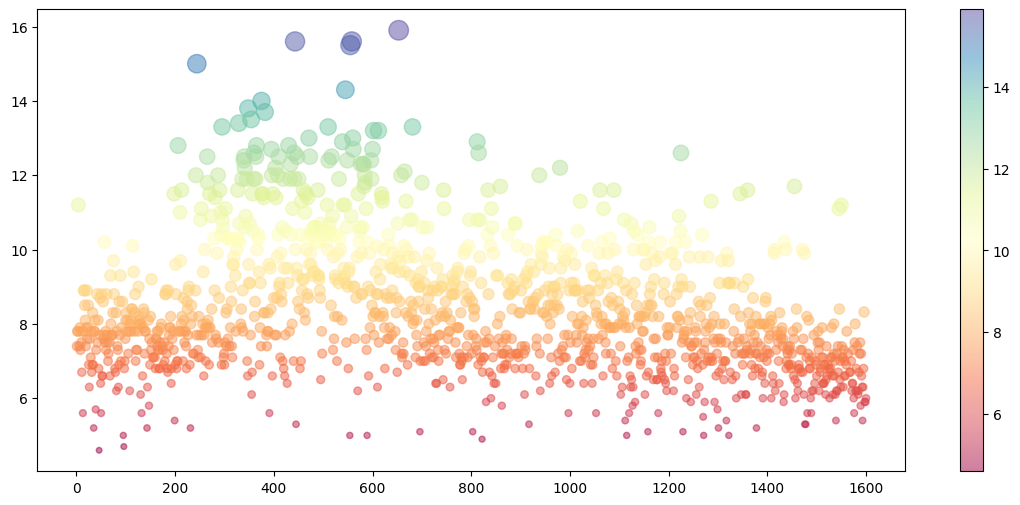

In [86]:
colors = data['fixed acidity']
area = np.pi * (0.5 * data['fixed acidity'] )**2 
plt.figure(figsize=(14, 6))
plt.scatter(data.index, data['fixed acidity'] ,s = area,c= colors,alpha= 0.5, cmap = 'Spectral')
plt.colorbar()
plt.show()

> It can be infered from the scatter diagram that most of the items have a `fixed acidity` between 12 and 0. In this range the desnsity of the scatter is hihgher.

### OTHER COLUMNS

Text(0.5, 1.0, 'qaulity')

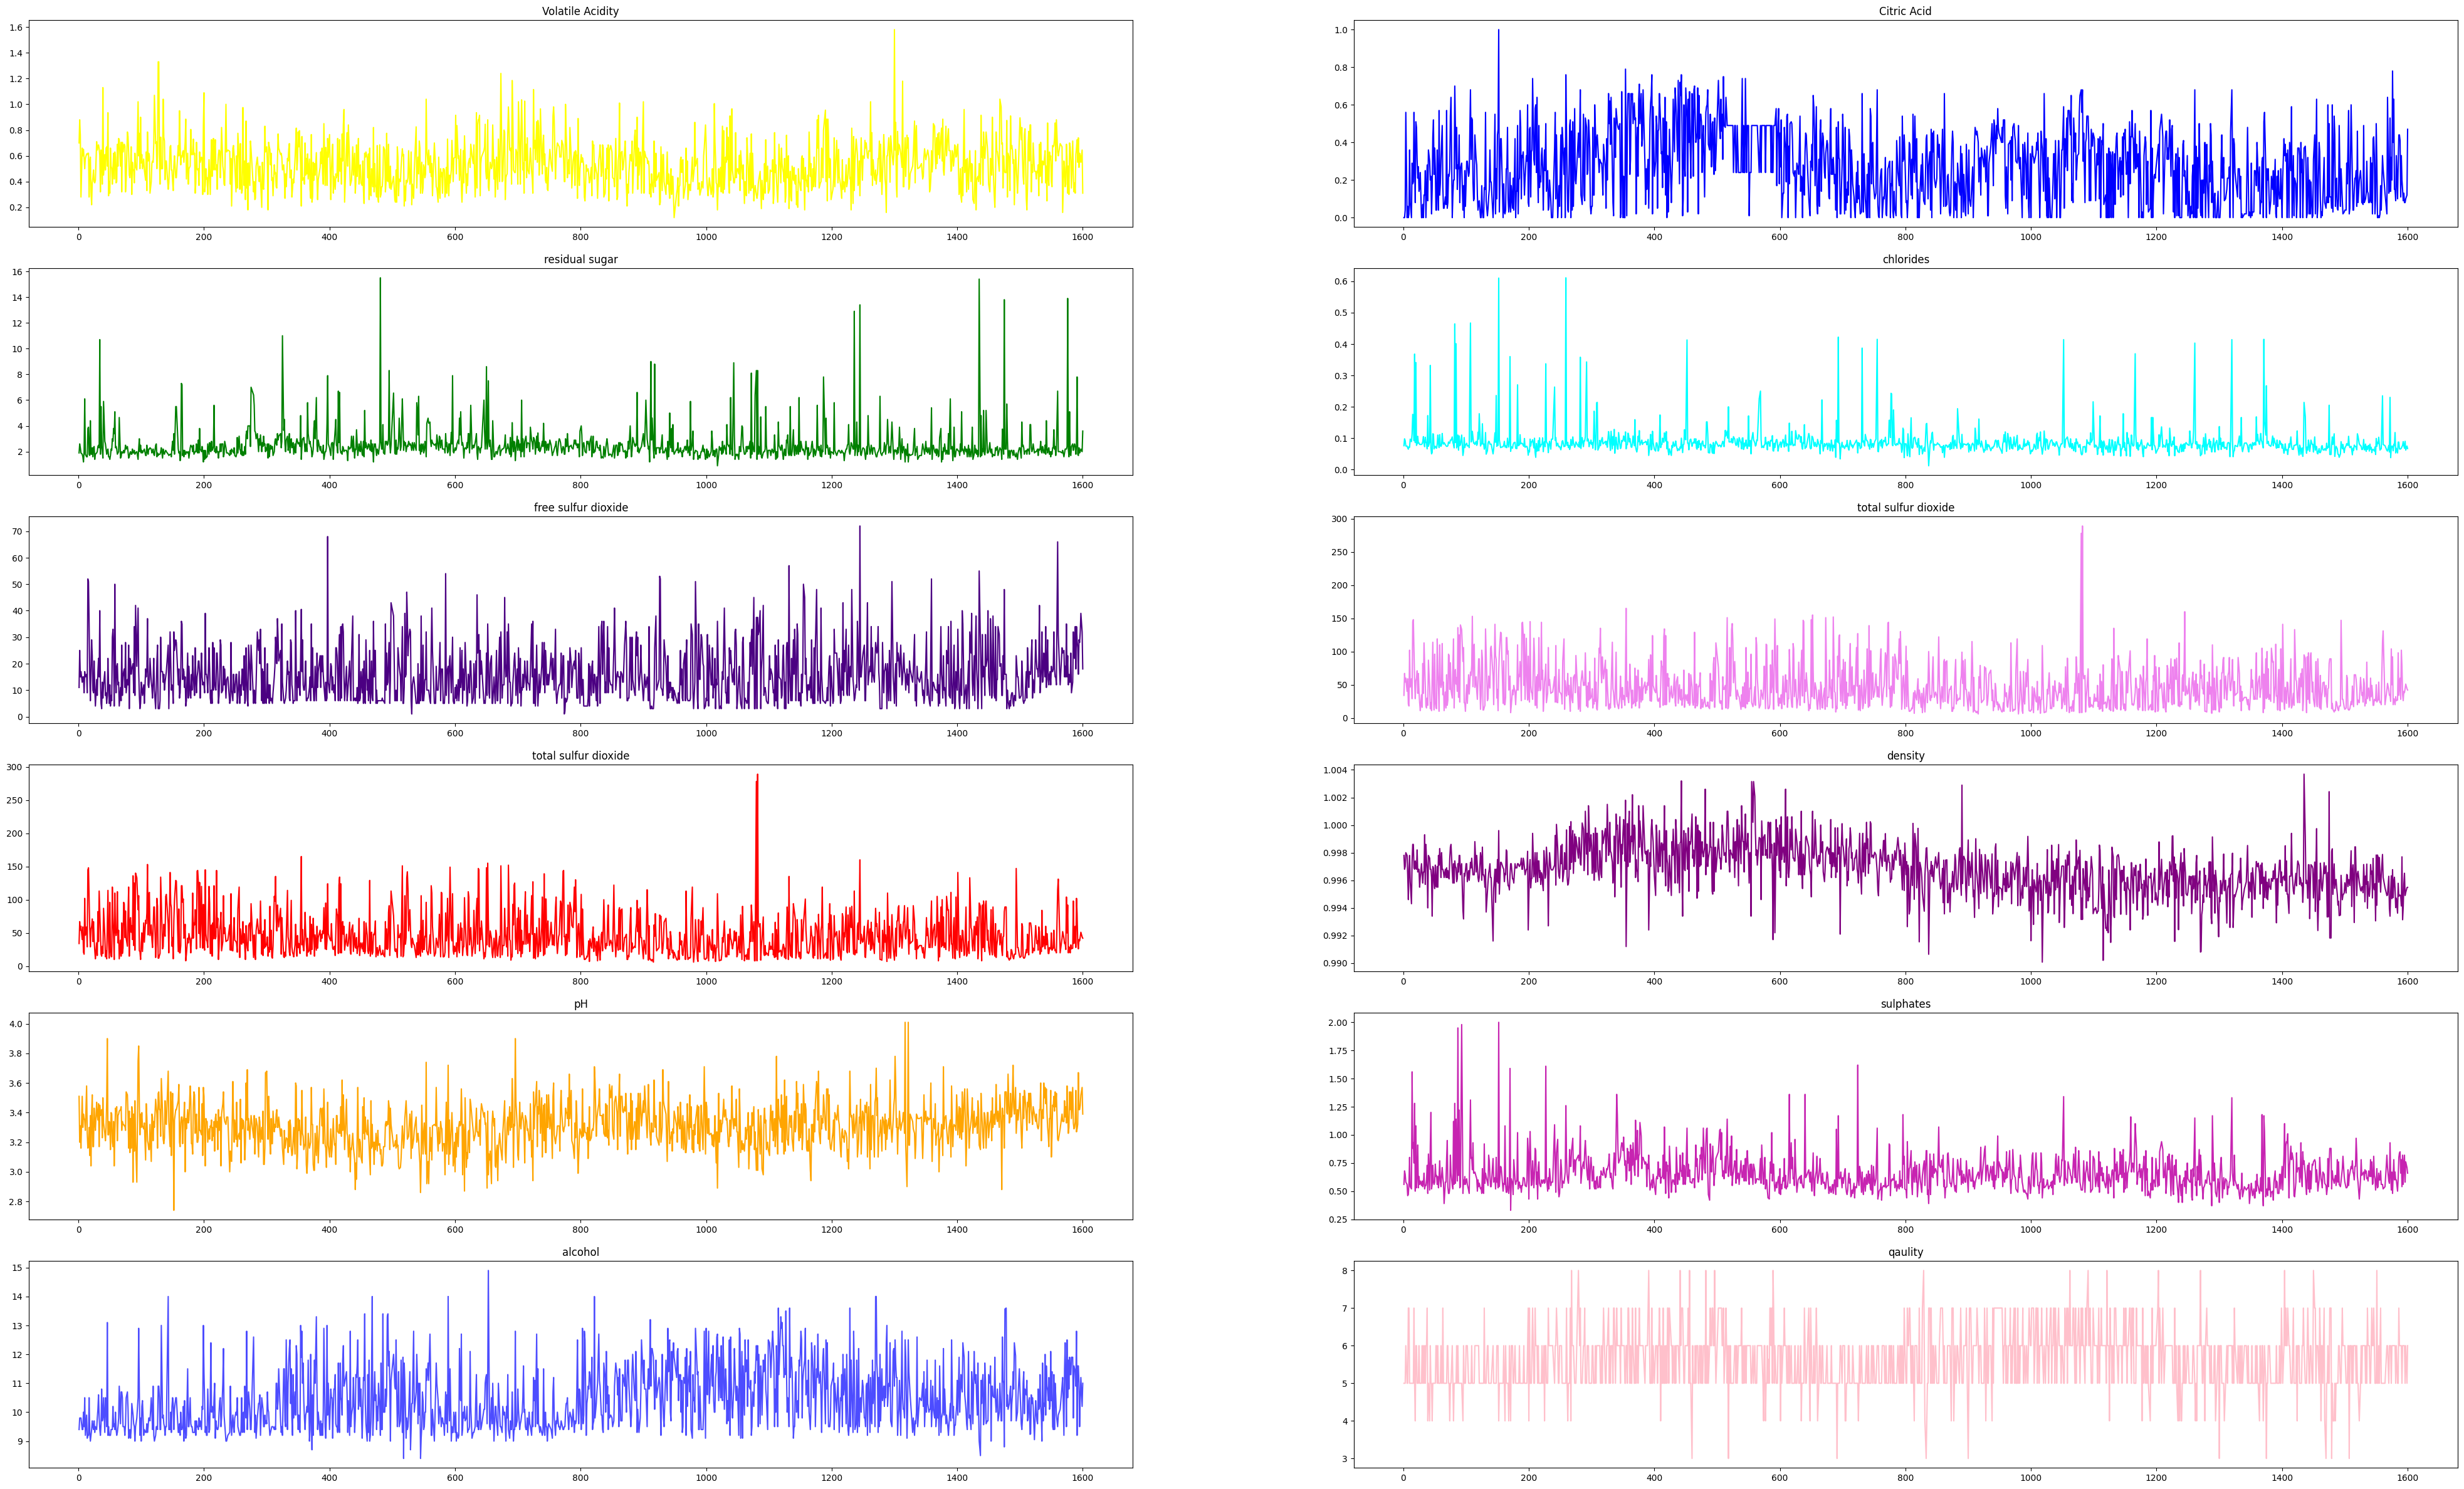

In [130]:
plot_objects = plt.subplots(nrows=6, ncols=2, figsize=(50, 30))

fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7,ax8),(ax9,ax10),(ax11,ax12)) = plot_objects

ax1.plot(data['volatile acidity'], c='yellow')
ax1.set_title( 'Volatile Acidity')
ax2.plot(data['citric acid'], c='blue')
ax2.set_title( 'Citric Acid')
ax3.plot(data['residual sugar'], c='green')
ax3.set_title( 'residual sugar')
ax4.plot(data['chlorides'], c='aqua')
ax4.set_title( 'chlorides')
ax5.plot(data['free sulfur dioxide'], c='indigo')
ax5.set_title( 'free sulfur dioxide')
ax6.plot(data['total sulfur dioxide'], c='violet')
ax6.set_title( 'total sulfur dioxide')
ax7.plot(data['total sulfur dioxide'], c='red')
ax7.set_title( 'total sulfur dioxide')
ax8.plot(data['density'], c='purple')
ax8.set_title( 'density')
ax9.plot(data['pH'], c='orange')
ax9.set_title( 'pH')
ax10.plot(data['sulphates'], c='#C724B1')
ax10.set_title( 'sulphates')
ax11.plot(data['alcohol'], c='#4D4DFF')
ax11.set_title( 'alcohol')
ax12.plot(data['quality'], c='pink')
ax12.set_title( 'qaulity')

## CORRELATION BETWEEN COLUMNS

![separator2](https://i.imgur.com/4gX5WFr.png)

In [132]:
data.corr(method='pearson', min_periods=1)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.254577     0.667162   
volatile acidity          -0.254577          1.000000    -0.551481   
citric acid                0.667162         -0.551481     1.000000   
residual sugar             0.110096         -0.002450     0.143585   
chlorides                  0.085205          0.054168     0.210793   
free sulfur dioxide       -0.140699         -0.020811    -0.049221   
total sulfur dioxide      -0.104987          0.071635     0.047363   
density                    0.670638          0.024051     0.358602   
pH                        -0.686156          0.247139    -0.550968   
sulphates                  0.187217         -0.256735     0.324420   
alcohol                   -0.062896         -0.197887     0.104239   
quality                    0.118022         -0.395345     0.227856   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.110096   0.085205            -0.140699   
volatile acidity           -0.002450   0.054168            -0.020811   
citric acid                 0.143585   0.210793            -0.049221   
residual sugar              1.000000   0.026448             0.160643   
chlorides                   0.026448   1.000000             0.001104   
free sulfur dioxide         0.160643   0.001104             1.000000   
total sulfur dioxide        0.201383   0.045661             0.667598   
density                     0.323783   0.192834            -0.018824   
pH                         -0.082961  -0.270830             0.057158   
sulphates                  -0.011576   0.394648             0.055051   
alcohol                     0.063442  -0.223340            -0.079464   
quality                     0.013685  -0.130135            -0.050444   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.104987  0.670638 -0.686156   0.187217   
volatile acidity                  0.071635  0.024051  0.247139  -0.256735   
citric acid                       0.047363  0.358602 -0.550968   0.324420   
residual sugar                    0.201383  0.323783 -0.082961  -0.011576   
chlorides                         0.045661  0.192834 -0.270830   0.394648   
free sulfur dioxide               0.667598 -0.018824  0.057158   0.055051   
total sulfur dioxide              1.000000  0.077113 -0.078435   0.036509   
density                           0.077113  1.000000 -0.356012   0.143920   
pH                               -0.078435 -0.356012  1.000000  -0.212962   
sulphates                         0.036509  0.143920 -0.212962   1.000000   
alcohol                          -0.216557 -0.505159  0.214012   0.092494   
quality                          -0.177396 -0.184175 -0.054974   0.248826   

                       alcohol   quality  
fixed acidity        -0.062896  0.118022  
volatile acidity     -0.197887 -0.395345  
citric acid           0.104239  0.227856  
residual sugar        0.063442  0.013685  
chlorides            -0.223340 -0.130135  
free sulfur dioxide  -0.079464 -0.050444  
total sulfur dioxide -0.216557 -0.177396  
density              -0.505159 -0.184175  
pH                    0.214012 -0.054974  
sulphates             0.092494  0.248826  
alcohol               1.000000  0.480477  
quality               0.480477  1.000000

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)